In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
la=pd.read_csv('LoanStatus.csv')
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
la.shape

(614, 13)

In [6]:
la.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking Missing Values

In [7]:
la.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we will fill the Missing Values in "LoanAmount" 

"Credit_History" by the

'Mean' & 'Median' of the respective variables.

In [8]:
la['LoanAmount']=la['LoanAmount'].fillna(la['LoanAmount'].mean())

In [9]:
la['Credit_History']=la['Credit_History'].fillna(la['Credit_History'].median())

In [10]:
la.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Need to drop missing values which is remaning

In [11]:
la.dropna(inplace=True)

In [12]:
la.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Thus we drop all the missing values to avoid disturbances in the model

In [13]:
la.shape

(542, 13)

# Statistical Matrix

<Axes: >

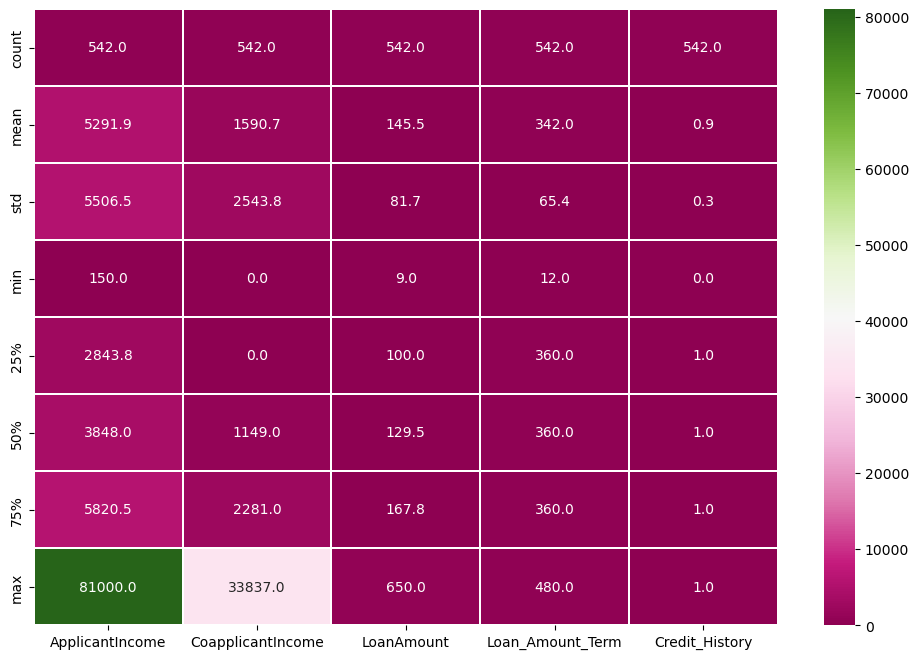

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(la.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [37]:
pd.crosstab(la['Gender'],la["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,33,65,98
Male,133,311,444
All,166,376,542


Applicant are male more

Irrespective Gender Applicant from each gender gets loan approval.

It means that gender doesnot play any role loan approval. 


In [38]:
pd.crosstab([la['Gender'],la['Married']],[la.Loan_Status],margins=True).style.background_gradient(cmap='summer_r')

Married man having more chances for getting up a loan

In [39]:
pd.crosstab([la['Dependents'],la['Gender']],[la.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

Female having zero dependents have more chances to get loan approval compare to Females with dependents.

For male Maximum loan 0 dependents followed by 2 dependents

In [40]:
 pd.crosstab([la['Education'],la['Gender']],[la.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

Graduated having more chance of getting a loan

# Encoding Categorical Data

In [41]:
Catg=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [44]:
from sklearn.preprocessing import LabelEncoder
ld = LabelEncoder()
for i in Catg:
    la[i] = ld.fit_transform(la[i])
la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Outlier detection and Removal

In [45]:
Num =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

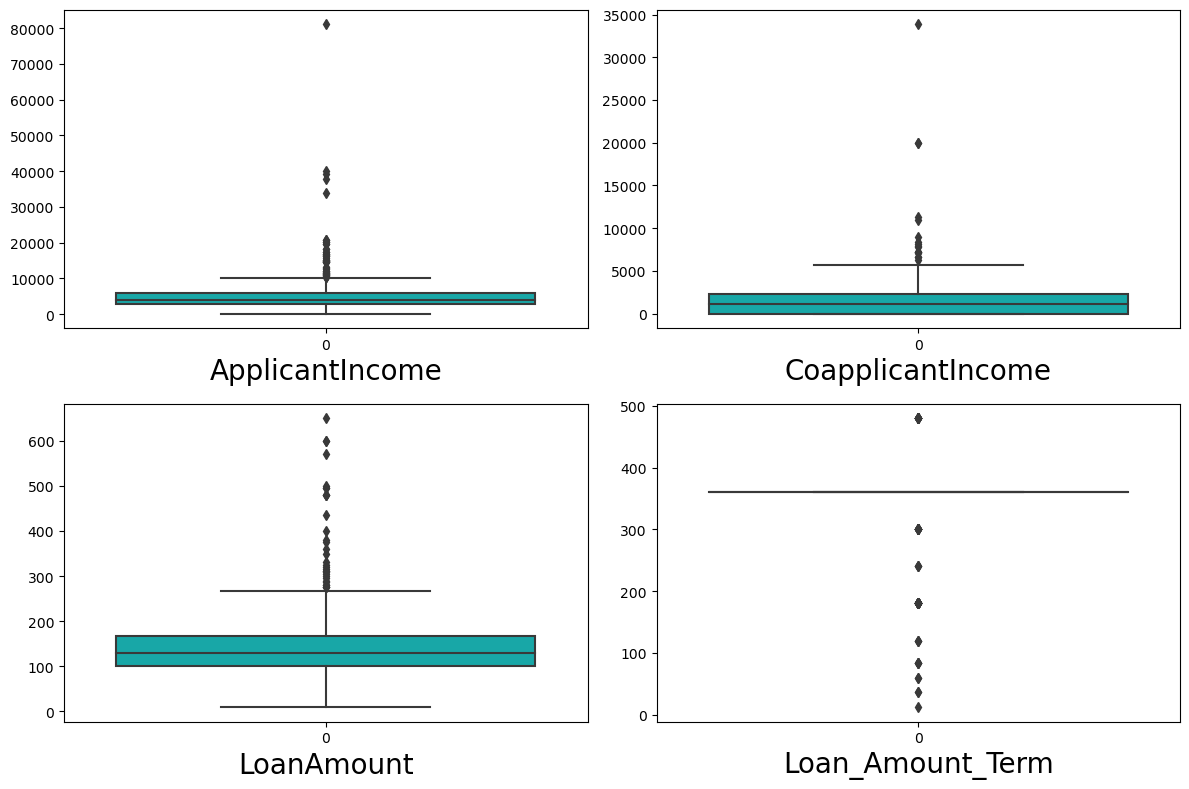

In [46]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Num:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(la[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Outliers can be seen in the dataset through boxplot

In [48]:
la.drop(["Loan_ID"], axis=1, inplace=True)

In [49]:
la['Dependents'] = la.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [51]:
la['Dependents'] =pd.to_numeric(la['Dependents'])

In [52]:
from scipy.stats import zscore
z = np.abs(zscore(la))
threshold = 3
la1 = la[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", la.shape)
print ("Shape of the dataframe after removing outliers: ", la1.shape)
print ("Percentage of data loss post outlier removal: ", (la.shape[0]-la1.shape[0])/la.shape[0]*100)
la=la1.copy()

Shape of the dataframe before removing outliers:  (542, 12)
Shape of the dataframe after removing outliers:  (510, 12)
Percentage of data loss post outlier removal:  5.904059040590406


we are loosing 5.9040 of data which will be acceptable

# Skewness 

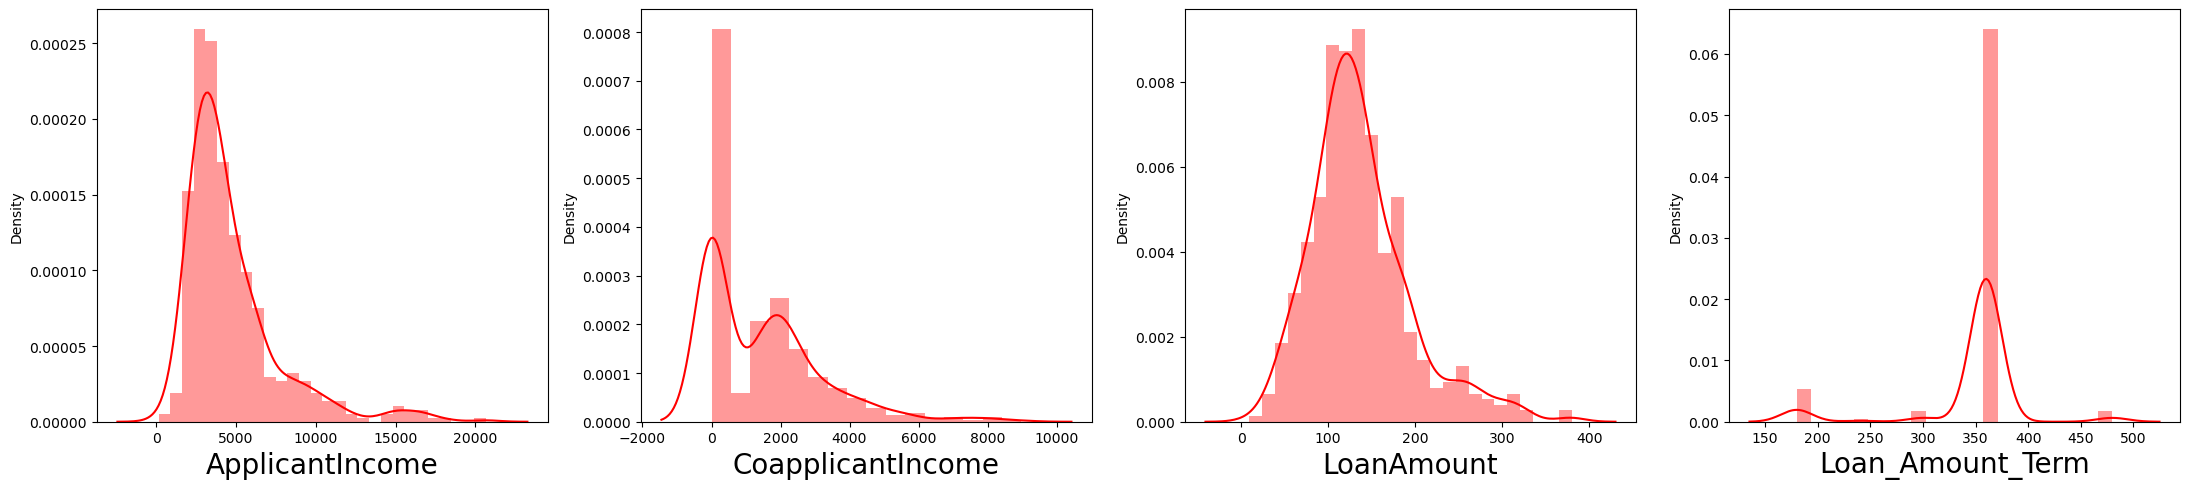

In [54]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Num:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(la[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [56]:
la.skew()

Gender              -1.633148
Married             -0.635363
Dependents           0.984530
Education            1.331157
Self_Employed        2.214668
ApplicantIncome      2.131173
CoapplicantIncome    1.393728
LoanAmount           1.083417
Loan_Amount_Term    -2.105328
Credit_History      -2.090579
Property_Area       -0.041557
Loan_Status         -0.865259
dtype: float64

In [57]:
sk = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

In [58]:
la[sk] = scale.fit_transform(la[sk].values)
la[sk].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.687248,-1.116497,0.299871
1,0.242018,0.749829,-0.023160
2,-0.533429,-1.116497,-1.410103
3,-0.807902,0.899065,-0.172958
4,0.733725,-1.116497,0.207799


In [59]:
la.skew()

Gender              -1.633148
Married             -0.635363
Dependents           0.984530
Education            1.331157
Self_Employed        2.214668
ApplicantIncome     -0.003721
CoapplicantIncome   -0.180725
LoanAmount           0.043705
Loan_Amount_Term    -2.105328
Credit_History      -2.090579
Property_Area       -0.041557
Loan_Status         -0.865259
dtype: float64

so we are ready to go!!!!

In [61]:
la.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.373359,0.209853,0.060835,-0.027650,0.040727,0.240065,0.177993,-0.124542,0.027956,-0.005066,0.039826
Married,0.373359,1.000000,0.355592,0.027531,-0.036334,-0.027002,0.323151,0.186515,-0.145405,0.038259,0.027125,0.109768
Dependents,0.209853,0.355592,1.000000,0.080247,0.042394,0.122499,0.000184,0.138716,-0.091972,-0.014298,0.002388,0.016770
Education,0.060835,0.027531,0.080247,1.000000,-0.010558,-0.160984,0.044353,-0.126747,-0.116869,-0.056143,-0.045955,-0.087921
Self_Employed,-0.027650,-0.036334,0.042394,-0.010558,1.000000,0.230521,-0.100945,0.110970,-0.022987,-0.047449,-0.041228,-0.051794
ApplicantIncome,0.040727,-0.027002,0.122499,-0.160984,0.230521,1.000000,-0.348646,0.454884,-0.065024,0.028024,-0.035423,0.005644
CoapplicantIncome,0.240065,0.323151,0.000184,0.044353,-0.100945,-0.348646,1.000000,0.198579,-0.012007,0.010993,-0.049933,0.077579
LoanAmount,0.177993,0.186515,0.138716,-0.126747,0.110970,0.454884,0.198579,1.000000,0.037735,-0.021310,-0.105232,-0.034220
Loan_Amount_Term,-0.124542,-0.145405,-0.091972,-0.116869,-0.022987,-0.065024,-0.012007,0.037735,1.000000,0.061294,-0.056134,0.006375
Credit_History,0.027956,0.038259,-0.014298,-0.056143,-0.047449,0.028024,0.010993,-0.021310,0.061294,1.000000,-0.009570,0.537426


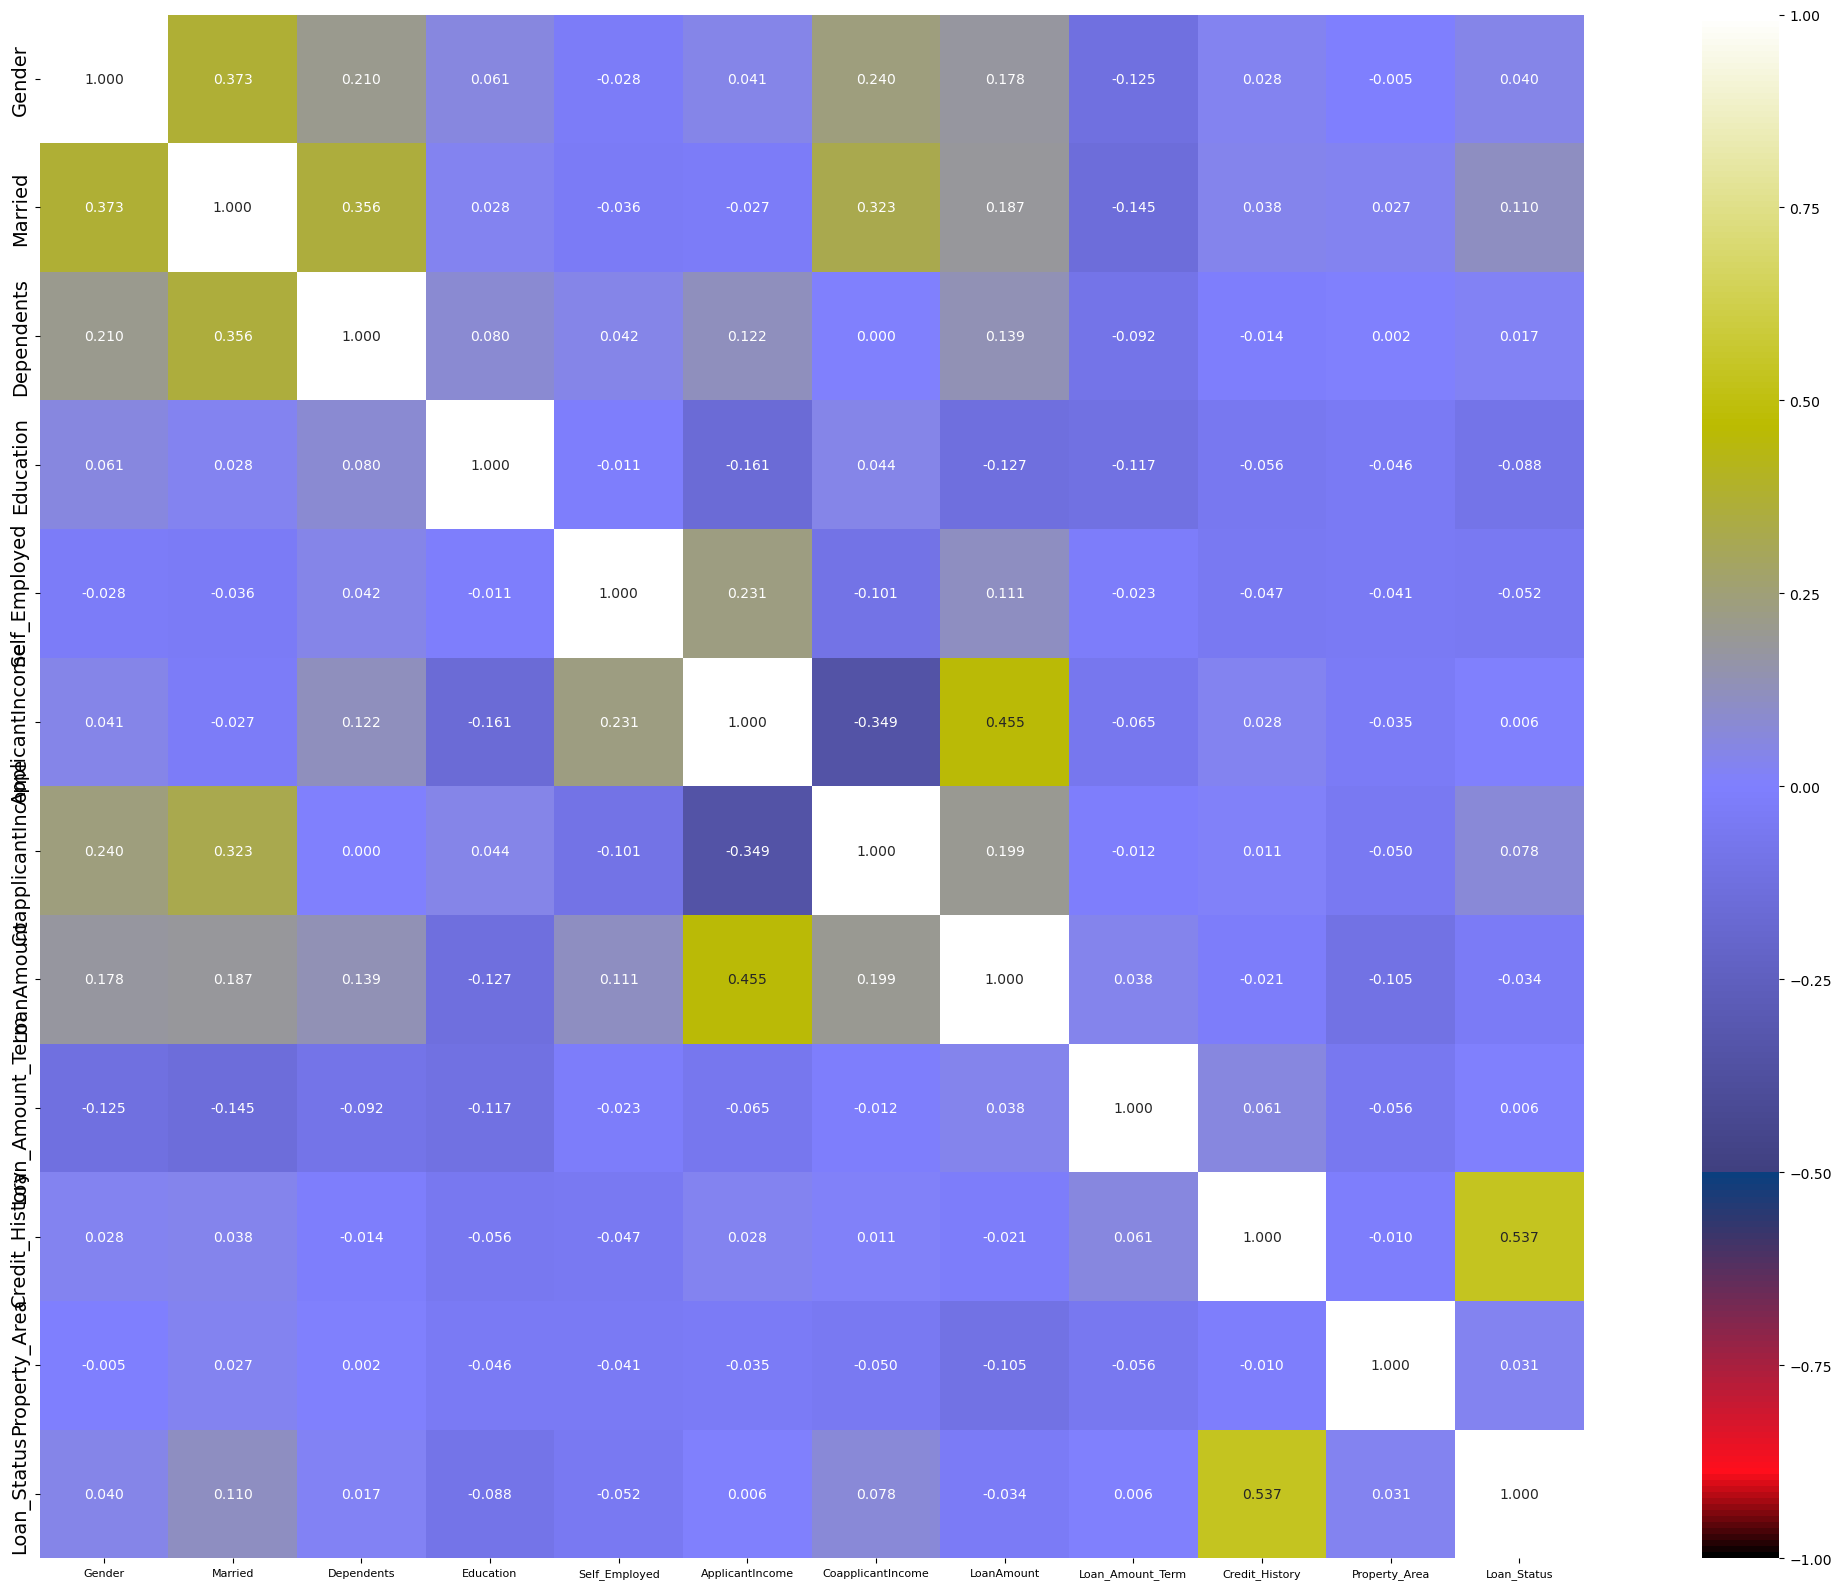

In [64]:
plt.figure(figsize=(24,16))
sns.heatmap(la.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=8)
plt.yticks(fontsize=14)
plt.show()

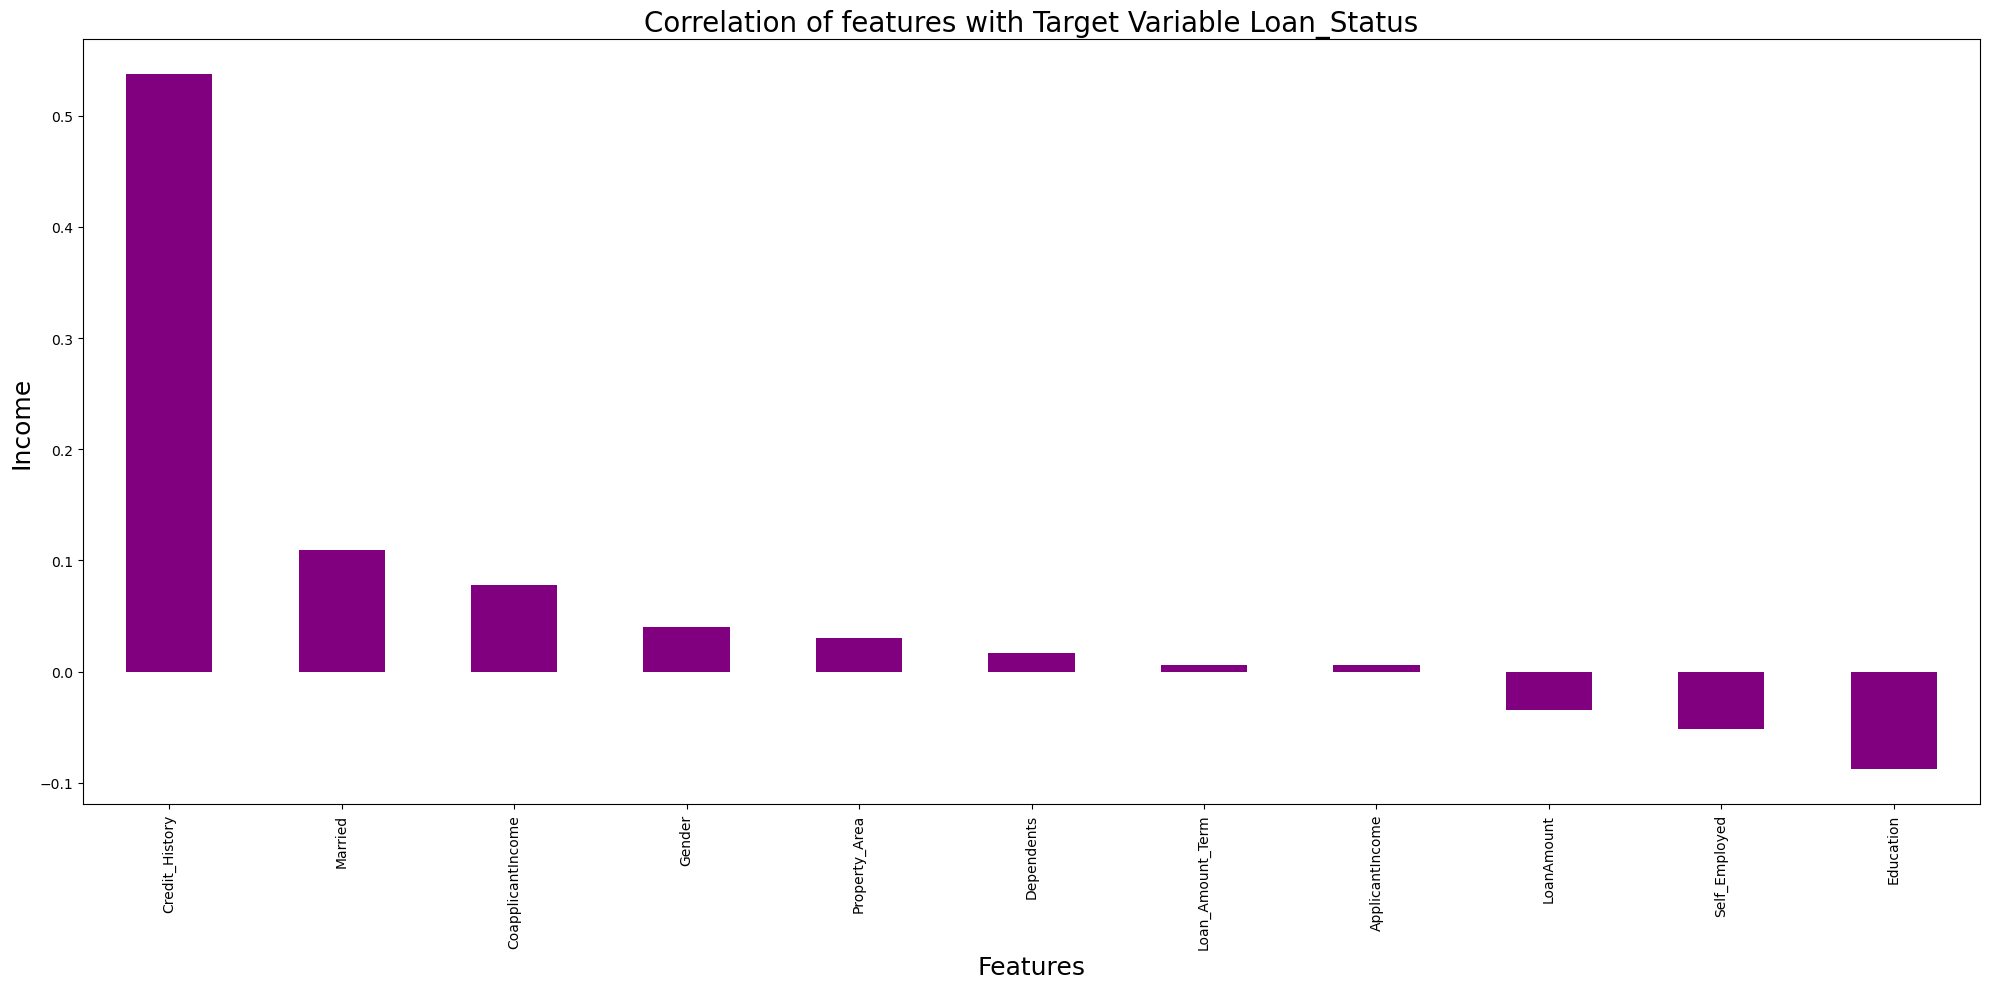

In [65]:
plt.figure(figsize = (20,10))
la.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=18)
plt.ylabel('Income',fontsize=18)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 20)
plt.show()

max corelation of 0.55 is between credit history and loan status

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cf= pd.DataFrame()
cf['VF']= [variance_inflation_factor(la.values,i) for i in range(la.shape[1])]
cf['Features']= la.columns
cf

,VF,Features
0,6.135224,Gender
1,4.004794,Married
2,1.876232,Dependents
3,1.344918,Education
4,1.213364,Self_Employed
5,1.797920,ApplicantIncome
6,1.564038,CoapplicantIncome
7,1.607869,LoanAmount
8,10.672232,Loan_Amount_Term
9,9.847800,Credit_History


all values is in limit of 10 no need to worry

# Balancing Of Target Variable

In [70]:
la.Loan_Status.value_counts()

1    356
0    154
Name: Loan_Status, dtype: int64

Need to balance the Target Variable

# Smote

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
X = la.drop(['Loan_Status'], axis =1)
Y = la['Loan_Status']

In [73]:
sample = SMOTE()
X, Y = sample.fit_resample(X, Y)

In [74]:
Y.value_counts()

1    356
0    356
Name: Loan_Status, dtype: int64

We successfully balance the data so need to movetowards the ML Model

# Standard Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
scaled= StandardScaler()
X_scale = scaled.fit_transform(X)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (498, 11)
Training target vector size: (498,)
Test feature matrix size: (214, 11)
Test target vector size: (214,)


# Finding Best Random State

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_re=LogisticRegression()
    log_re.fit(X_train,Y_train)
    y_pred=log_re.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7990654205607477 on Random_state 232


# Logistic Regression Model

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=232, test_size=.3)
log_re=LogisticRegression()
log_re.fit(X_train,Y_train)
y_pred=log_re.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7990654205607477


Confusion matrix of Logistics Regression : 
 [[73 36]
 [ 7 98]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       109
           1       0.73      0.93      0.82       105

    accuracy                           0.80       214
   macro avg       0.82      0.80      0.80       214
weighted avg       0.82      0.80      0.80       214



In [83]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_va = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_va.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4636305328901855
RMSE value for k=  2 is: 0.5115488666693087
RMSE value for k=  3 is: 0.4833682445228318
RMSE value for k=  4 is: 0.516096057131728
RMSE value for k=  5 is: 0.516096057131728
RMSE value for k=  6 is: 0.4833682445228318
RMSE value for k=  7 is: 0.4881779972605748
RMSE value for k=  8 is: 0.516096057131728
RMSE value for k=  9 is: 0.5069608917800194
RMSE value for k=  10 is: 0.5069608917800194
RMSE value for k=  11 is: 0.5069608917800194
RMSE value for k=  12 is: 0.5115488666693087
RMSE value for k=  13 is: 0.5023310149673528
RMSE value for k=  14 is: 0.5250723136668313
RMSE value for k=  15 is: 0.5115488666693087
RMSE value for k=  16 is: 0.49765806675052415
RMSE value for k=  17 is: 0.4881779972605748
RMSE value for k=  18 is: 0.49765806675052415
RMSE value for k=  19 is: 0.49765806675052415
RMSE value for k=  20 is: 0.5069608917800194
RMSE value for k=  21 is: 0.49765806675052415
RMSE value for k=  22 is: 0.4881779972605748
RMSE value for k= 

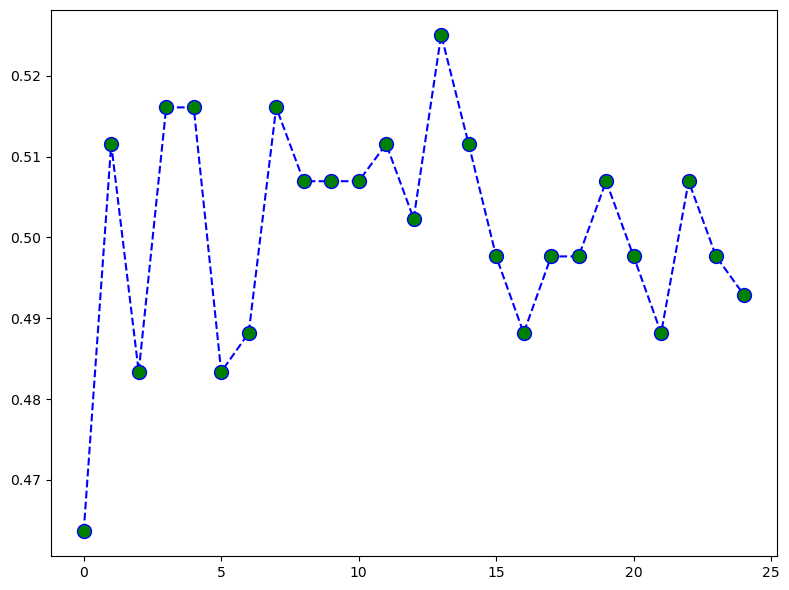

In [85]:
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_va, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k=3 we get the minimum RMSE value

In [88]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.69230769 0.72027972 0.6971831  0.78873239 0.8028169 ]
Mean Score : 0.7402639613907219
Std deviation : 0.04651278034396018




Cross Validation Score SVC() :

Score : [0.6993007  0.73426573 0.73239437 0.73239437 0.8028169 ]
Mean Score : 0.7402344134738501
Std deviation : 0.03391369801771486




Cross Validation Score GaussianNB() :

Score : [0.67132867 0.72027972 0.71830986 0.76056338 0.71126761]
Mean Score : 0.7163498473357628
Std deviation : 0.02837906803623463




Cross Validation Score DecisionTreeClassifier() :

Score : [0.67832168 0.75524476 0.77464789 0.79577465 0.83802817]
Mean Score : 0.7684034275583571
Std deviation : 0.05277054823561035




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.74125874 0.72727273 0.77464789 0.73943662 0.82394366]
Mean Score : 0.7613119275091107
Std deviation : 0.03504256984999367




Cross Validation Score RandomForestClassifier() :

Score : [0.76923077 0.82517483 

# Random forest gives maximum accuracy so we use random forest classifier()

# Hyper Parameter Tuning: Grid Search CV

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
para = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [91]:
GCV = GridSearchCV(RandomForestClassifier(),para,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.740 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.780 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.760 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.808 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [92]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 70}

In [93]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 70, max_depth=60 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8271028037383178
